In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.tail()

,Family,Father,Mother,Gender,Height,Kids
893,136A,68.5,65.0,M,68.5,8
894,136A,68.5,65.0,M,67.7,8
895,136A,68.5,65.0,F,64.0,8
896,136A,68.5,65.0,F,63.5,8
897,136A,68.5,65.0,F,63.0,8


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father, Son으로 변경
- 단위 변경(inch -> centi)

In [ ]:
# 아들만 필터링
df = df[df.Gender =='M']
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4


In [ ]:
df=df[['Father', 'Height']]
df.rename(columns={'Height':'Son'}, inplace=True) #df.columns=['Father', 'Son]도 가능
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5


In [ ]:
df = df*2.54
df

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070
...,...,...
890,173.99,182.880
891,173.99,179.070
892,173.99,174.498
893,173.99,173.990


- 산점도 그리기 : X는 독립변수, Y는 종속변수

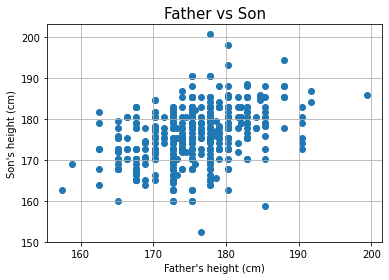

In [ ]:
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

- 회귀선을 구하고 그리기 : np.linalg.lstsq(), np.polyfit()

In [ ]:
weight, bias = np.polyfit(df.Father, df.Son, 1) #X, y, 차수
weight, bias

(0.447747917603028, 97.17763700739309)

In [ ]:
xs = np.array([156, 201])
ys = weight * xs + bias
ys

array([167.02631215, 187.17496845])

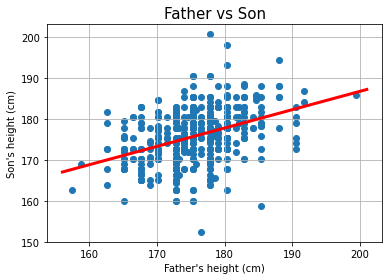

In [ ]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

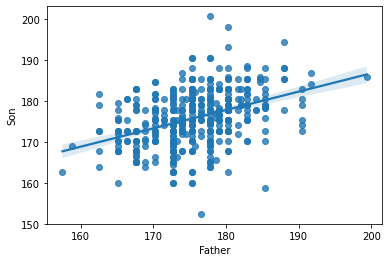

In [ ]:
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df)

- 사이킷런으로 회귀식 구하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [ ]:
lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [ ]:
# coefficient(계수), weight
lr.coef_

array([0.44774792])

In [ ]:
# intercept(절편), bias
lr.intercept_

97.17763700739341

In [ ]:
# 잔차 제곱의 합(RSS : Residual Sum of Square)
lr._residues

17556.59951549399

In [ ]:
# 평가 - R squared : 성능 평가 함수
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

0.15312927478307048

In [ ]:
# 위와 동일한 결과값
from sklearn.metrics import r2_score
pred = lr.predict(df.Father.values.reshape(-1,1))
r2_score(df.Son.values, pred)

0.15312927478307048